# Become the one with data
This notebook goes through a basic data analysis of the loan eligiblity dataset with python.  

## Step 0: Why EDA
> Not all data comes to us nicely gift wrapped so that we can model directly onto it. Most of the time, we won't even know what the data is. So it is *probably* good to know the data, and then make a model based on it. This process is often known as EDA or **Exploratory data analysis**. This is a fundamental step in the machine learning pipeline. If we train the model on dirty data, it will obviously give us dirty results. We try to figure out more about the data, often with visualizations, to make the predictions of the model better.

We'll use the checklist by [Jason Brownlee](https://machinelearningmastery.com/about/)  
> Python Project Template  
> 1. Prepare Problem  
>   a) Load libraries  
>   b) Load dataset  
> 2. Summarize Data  
>   a) Descriptive statistics  
>   b) Data visualizations  

## Step 1: Getting the data
You can download the data for this project from [https://www.kaggle.com/datasets/vikasukani/loan-eligible-dataset](https://www.kaggle.com/datasets/vikasukani/loan-eligible-dataset). We'll use `opendatasets` python library to get it on our local machine. Read more about the library https://github.com/JovianML/opendatasets.

In [1]:
!pip install opendatasets

In [2]:
import opendatasets as od
URL="https://www.kaggle.com/datasets/vikasukani/loan-eligible-dataset"
od.download(URL)

Skipping, found downloaded files in ".\loan-eligible-dataset" (use force=True to force download)


Great now that we have our data, we can now analyze it.

## Step 2: Work throught the notebook
First we'll import all the necessary libraries essential for data manipulation and visualizations. If you don't have them in your environment, create the environment using the `requirements.txt`. If even that doesn't work, Google "how to install <library_name>".  
**PS:** If you have any questions, doubts, or errors, please let me know.

In [3]:
# Importing necessary dependancies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-muted')

### Loading the data
We have two sets of data. The train set and test set. We'll analyse the train set, as according to convention that is the data that neither we or model has ever seen.

In [4]:
train_data=pd.read_csv('loan-eligible-dataset\loan-train.csv',index_col=[0])
train_data.head(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, LP001002 to LP002990
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 62.4+ KB


The column `Credit_History` is clearly a categorical column, although we can see that it has a `float64` datatype.  
Let's convert the column so that it makes better sense.

In [6]:
train_data.Credit_History = train_data.Credit_History.map(lambda x: str(x)).replace({
    "1.0": "Yes",
    "0.0": "No",
    "nan": np.nan
})

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, LP001002 to LP002990
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    object 
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(3), int64(1), object(8)
memory usage: 62.4+ KB


Great! Now that we have converted the columns in the preferable datatypes let's know more about data.

In [8]:
train_data.shape

(614, 12)

Our data has 614 rows and 12 columns, which is fairly low. It has 7 categorical columns and 5 numerical columns.  
Let's check the null values in the dataset.  
> ⚠️ **Note:** There is a `NaN` value in the first row itself. This indicates there could be more `NaN` values in the dataset. `NaN` values indicate that the data is not available. There could be multiple reasons. But we'll ignore the reasons and focus on the `NaN` itself.

In [9]:
train_data.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Ok we were right about this. We have now confirmed that there are infact `na` values in our data. This is bad for making predictions. We'll have to either remove these rows entirely or impute some values.  
Following the checklist let's get some statistical summary about the data.

In [10]:
train_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
count,614.000000,614.000000,592.000000,600.00000
mean,5403.459283,1621.245798,146.412162,342.00000
std,6109.041673,2926.248369,85.587325,65.12041
min,150.000000,0.000000,9.000000,12.00000
25%,2877.500000,0.000000,100.000000,360.00000
50%,3812.500000,1188.500000,128.000000,360.00000
75%,5795.000000,2297.250000,168.000000,360.00000
max,81000.000000,41667.000000,700.000000,480.00000


Looking at this statistical analysis, we can conclude:
- `ApplicantIncome` has high deviation from mean. This may indicate that the data has families of all types of incomes.
- `ApplicantIncome`'s minimum value is really low than the mean. A box-plot can help us understand this data.
- `CoapplicantIncome` also has a large deviation from mean. Both the minimum and the first quartile has the same value, which is way smaller than the second quartile.
- `Loan_Amount_Term` is in terms of months. 480 means 40 years.

Box plots and histograms will definitely help us to better understand this data.

### Univariate analysis
Analysing the columns one by one.

#### Numerical columns

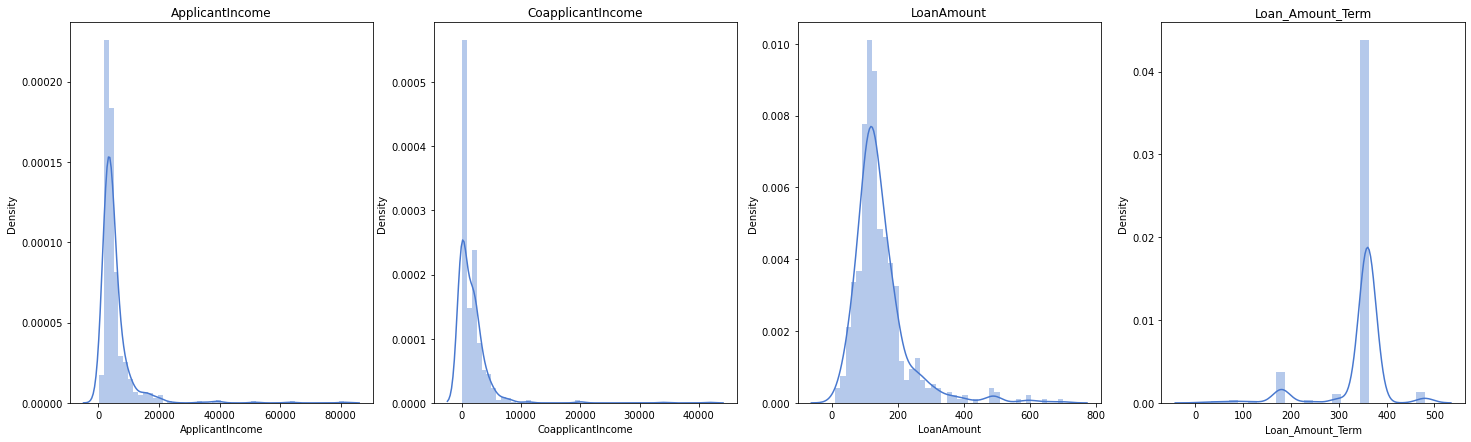

In [46]:
# Separate the numerical columns to better visualize the data
num_cols=['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']
plt.figure(figsize=(25,7))
for idx,col in enumerate(num_cols):
    plt.subplot(1,4,idx+1)
    sns.distplot(train_data[col])
    plt.title(f"{col}")
plt.show();

All of the columns resemble a normal distribution except for `Loan_Amount_Term`. This is great for the model as machine learning tend to predict better when the distributions are normal.  
Bining the values in the `Loan_Amount_Term` can help.

In [33]:
train_data['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [35]:
# Simplify the values so it doesn't show us big numbers like 360.0
train_data['Term_Simplified']=train_data['Loan_Amount_Term']/12.0
train_data['Term_Simplified'].value_counts()

30.0    512
15.0     44
40.0     15
25.0     13
20.0      4
7.0       4
10.0      3
5.0       2
3.0       2
1.0       1
Name: Term_Simplified, dtype: int64

In [44]:
bins=[0.0,6.0,12.0,18.0,24.0,30.0]
labels=[1,2,3,4,5]
train_data['Term_binned']=pd.cut(train_data['Term_Simplified'],bins=bins,labels=labels)
train_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Term_Simplified,Term_binned
Loan_ID,,,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,Yes,Urban,Y,30.0,5
LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,Yes,Rural,N,30.0,5
LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,Yes,Urban,Y,30.0,5
LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,Yes,Urban,Y,30.0,5
LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,Yes,Urban,Y,30.0,5


Phew! We have binned the values now. Using this as a categorical column will be an option now.
> 📖 **Resource:** I used 2 resources to get through this step, go check yourself too:
> * https://stackoverflow.com/questions/45273731/binning-a-column-with-python-pandas
> * https://stackoverflow.com/questions/59482017/bin-labels-must-be-one-fewer-than-the-number-of-bin-edges-after-passing-pd-qcu  

Always remember machine learning explorer's motto: "Visaulize, visualize, visualize".  
Let's see some box-plots of our numerical columns.

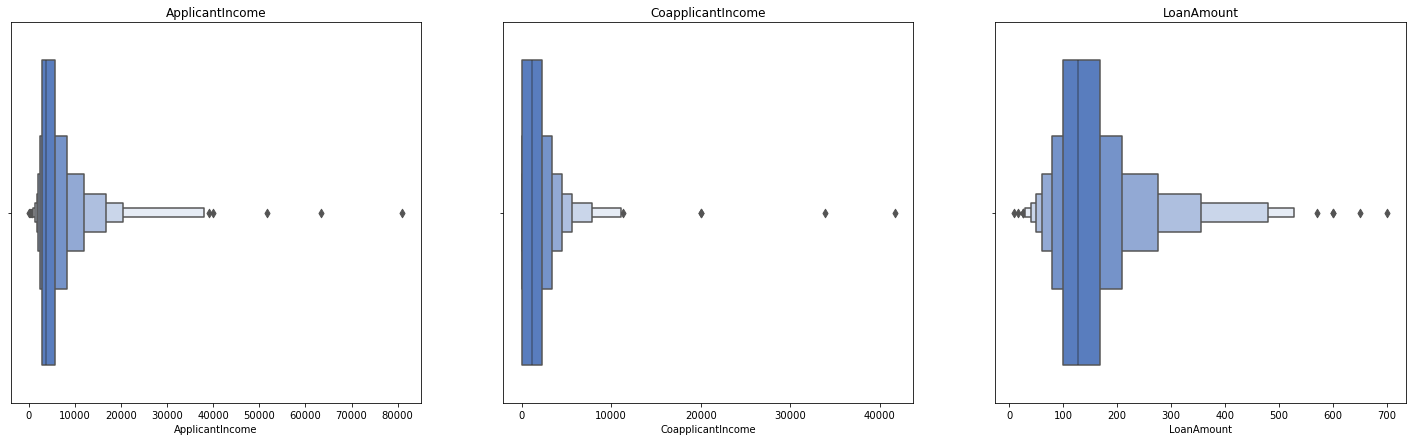

In [51]:
# Remove the Loan_Amount_Term column, because we have broken it down in bins and stored it in the column Term_binned
num_cols.remove('Loan_Amount_Term')
plt.figure(figsize=(25,7))
for idx,col in enumerate(num_cols):
    plt.subplot(1,3,idx+1)
    sns.boxenplot(x=col,data=train_data)
    plt.title(f"{col}")
plt.show();

There are a few outliers in our data. We might have to remove them when we our transforming our data for our predictions. We can use the IQR technique to remove these outliers.

#### Categorical

In [47]:
cat_cols=[col for col in train_data.columns if col not in num_cols]
print(cat_cols)

['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area', 'Loan_Status', 'Term_Simplified', 'Term_binned']


We are seeing some extra columns. Let's remove them and make a `countplot` for each column displaying the counts of various categories in the column.

In [48]:
cat_cols.remove('Term_Simplified')
print(cat_cols)

['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area', 'Loan_Status', 'Term_binned']


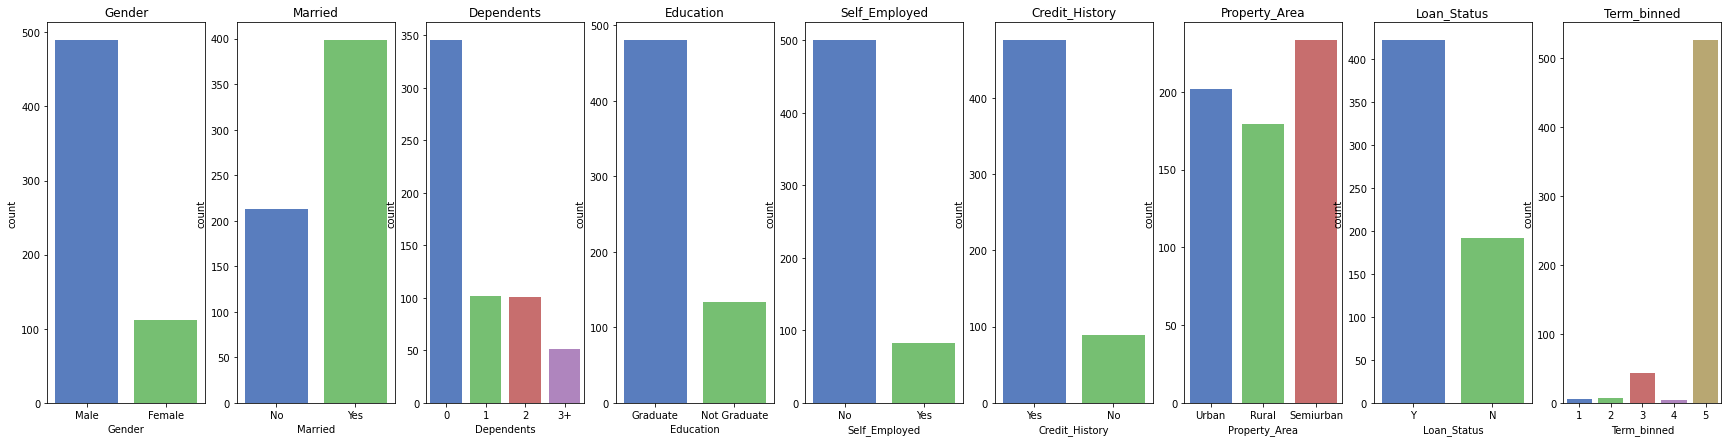

In [49]:
# Making countplots for each categorical column
plt.figure(figsize=(30,7))
for idx,col in enumerate(cat_cols):
    plt.subplot(1,len(cat_cols),idx+1)
    sns.countplot(x=col,data=train_data)
    plt.title(col)
plt.show();

Seeing the plots, we can conclude:
- `Gender` has a lot of `Male` value.
- `Married` is dominated by the `Yes` value. It is almost 50% more than the other value.
- `Dependants`, there are a lot of people with no dependants. We should check hwo much this dependants affect the `Loan_Status`.
- `Education` has a lot of `Graduate` values. The other value is really less, even less than 50% of the other value.
- `Self_Employed`, this is dominated by the `No`, seems like a lot of people have a job.
- `Credit_History`, also is imbalanced as we can see from the graph.
- `Property_Area`, is balanced. It is the only column which has same proportions of categories.
- `Loan_Status`, has a lot of people which have their loan status approved.
- `Term_binned`, the column we created, has a lot of people falling in the last bin.  

> ⚠️**Note:** Many of these columns don't have the expected ratio i.e. we often expect that the data has proper representation of each category. This isn't there in our data. Even the `Loan_Status` column, our **target** variable is imbalanced. This can a big problem when we make our model.

### Bivariate
Now that we have seen all the columns one by one. Let's look at how it affects other columns.

#### Categorical

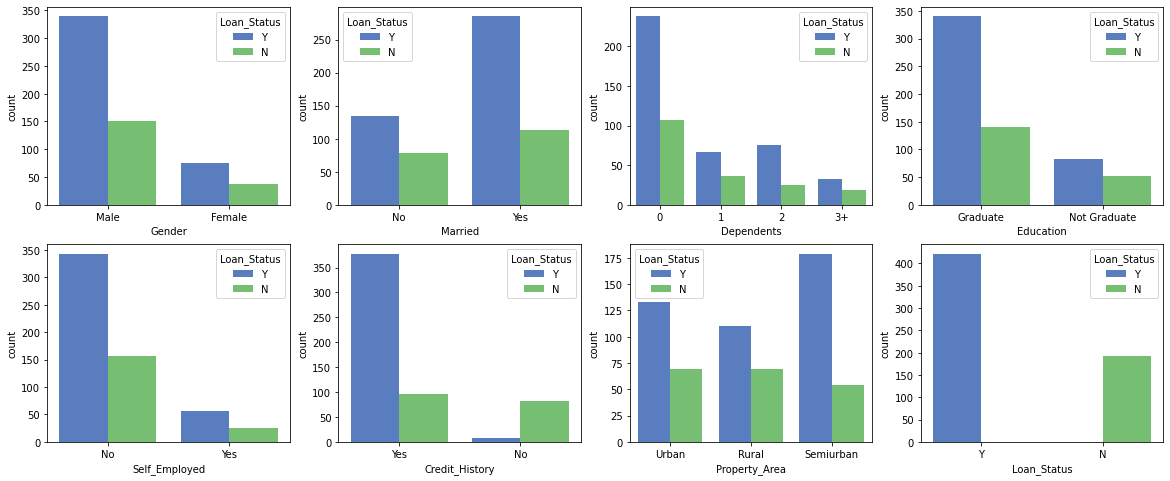

In [63]:
rows = len(cat_cols) // 4
fig, axes = plt.subplots(rows, 4, figsize=(20,8))
for i, feature in enumerate(cat_cols):
    sns.countplot(x=feature, data=train_data,hue="Loan_Status", ax=axes[(i)//4, (i) % 4 ])
plt.show();

Looking from the plots, we can see that if you don't have credit history, you have a low chance of loan approval.

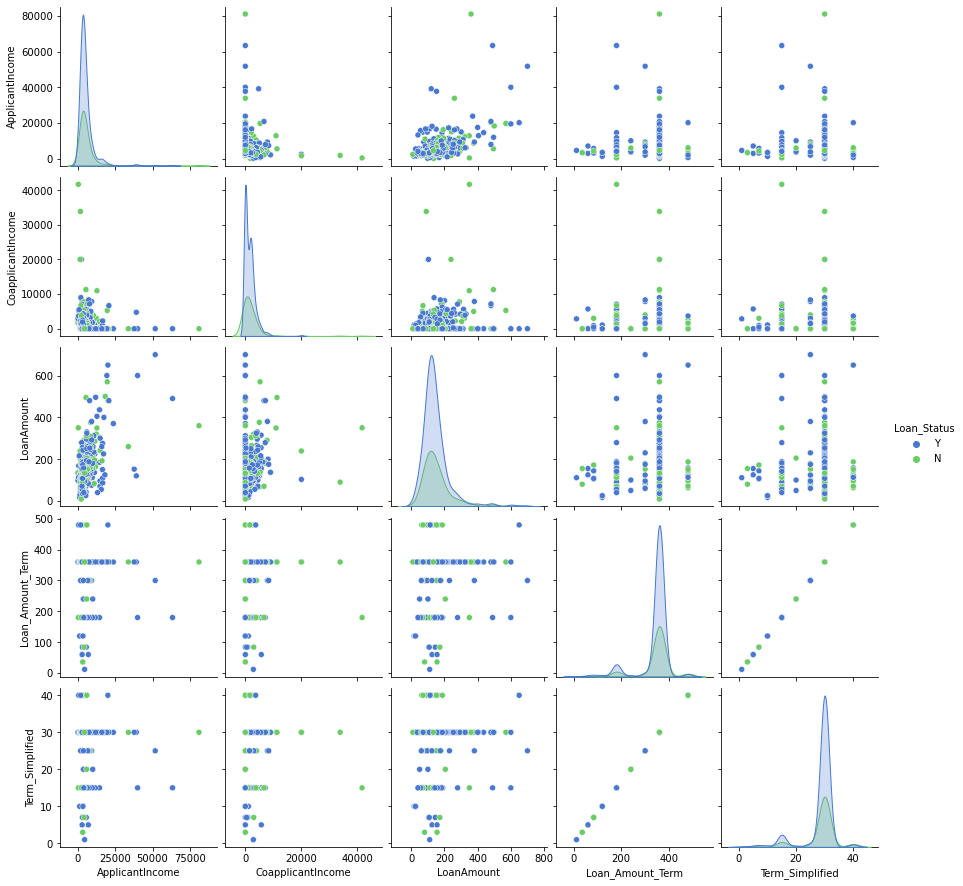

In [65]:
sns.pairplot(train_data, hue="Loan_Status")

Let's create a correlation matrix for the data. This is to check, if the data has multicollinearity or not.

<AxesSubplot:>

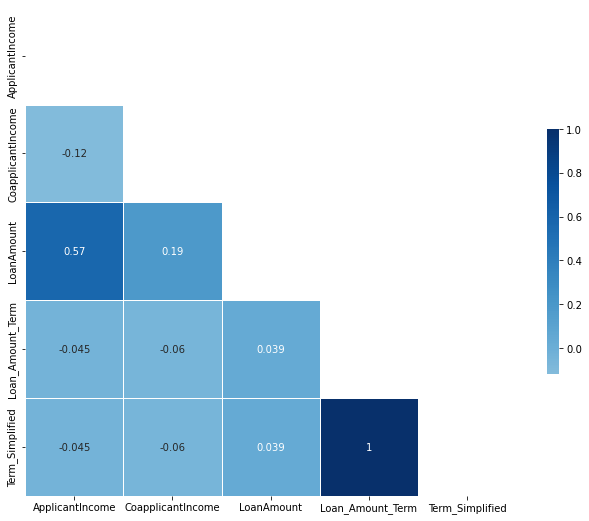

In [75]:
# Compute the correlation matrix
corr = train_data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = plt.cm.Blues

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,annot=True, linewidths=.5, cbar_kws={"shrink": .5})

Great now that we have analyzed the data it is time to make predictions on the eligibility.